SEÑAL RAPIDA

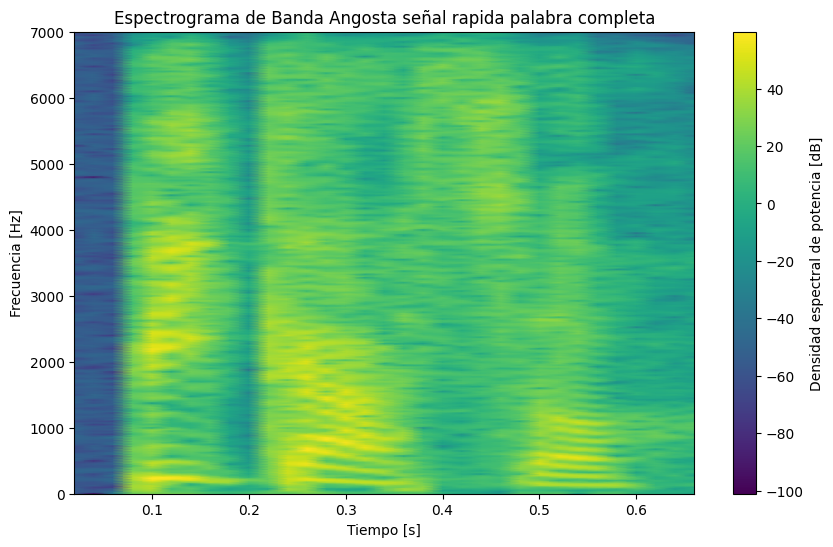

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

fs, señal = wavfile.read('rapidoo.wav') # Cargamos archivo  

ventana = 0.04                          # 40ms para banda angosta
N = int(fs * ventana)                   # Cantidad de muestras en la ventana
frecuencia_solape = N // 2              # Solape de 50%

f, t, Sxx = spectrogram(señal, fs, window='hann', nperseg=N, noverlap=frecuencia_solape)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')  
plt.title('Espectrograma de Banda Angosta señal rapida palabra completa')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Densidad espectral de potencia [dB]')
plt.ylim([0, 7000])  
plt.show()

---------------------------

PUNTO 8

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import firwin, lfilter

x, fs = sf.read('lentoo.wav')                           # Cargamos archivo

#------------------- Parámetros de decimación------------------------------------------------------
M = 2                           # Factor de decimación (doble de velocidad)
new_fs = fs // M                # Nueva frecuencia de sampling
cutoff = new_fs / 2             # Nueva frecuencia de Nyquist (frecuencia de corte)
numtaps = 101                   # Coeficientes del filtro FIR (Orden del filtro + 1)
# Si numtaps es mas grande entonces mas selectivo es el filtro, pero tiene mas costo computacional)
#--------------------------------------------------------------------------------------------------

taps = firwin(numtaps, cutoff, window='hamming', fs=fs) # Diseño de filtro

# En el primer parámetro va taps, que es el vector con tamaño numtaps con los coeficientes numerador del filtro
# El segundo parámetro son los coeficientes del denominador (para FIR es 1)

x_filtered = lfilter(taps, 1.0, x)                      # Aplicamos filtro FIR diseñado

sf.write('senal_acelerada.wav', x_filtered[::M], fs)    # Me mantengo con la mitad de las muestras

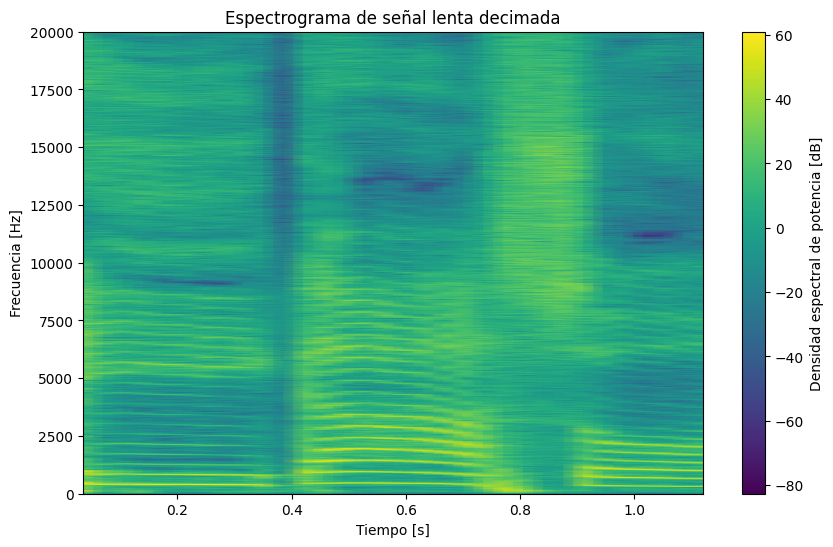

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

fs, señal = wavfile.read('senal_acelerada.wav')     # fs = frecuencia de muestreo, señal = vector de datos 

ventana = 0.07                                      # Tamaño de ventana para palabra completa   
N = int(fs * ventana)                               # cantidad de muestras en la ventana
frecuencia_solape = N // 2                          # solapamiento del 50%

f, t, Sxx = spectrogram(señal, fs, window='hann', nperseg=N, noverlap=frecuencia_solape)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Espectrograma de señal lenta decimada')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Densidad espectral de potencia [dB]')
plt.ylim([0, 20000])
plt.show()

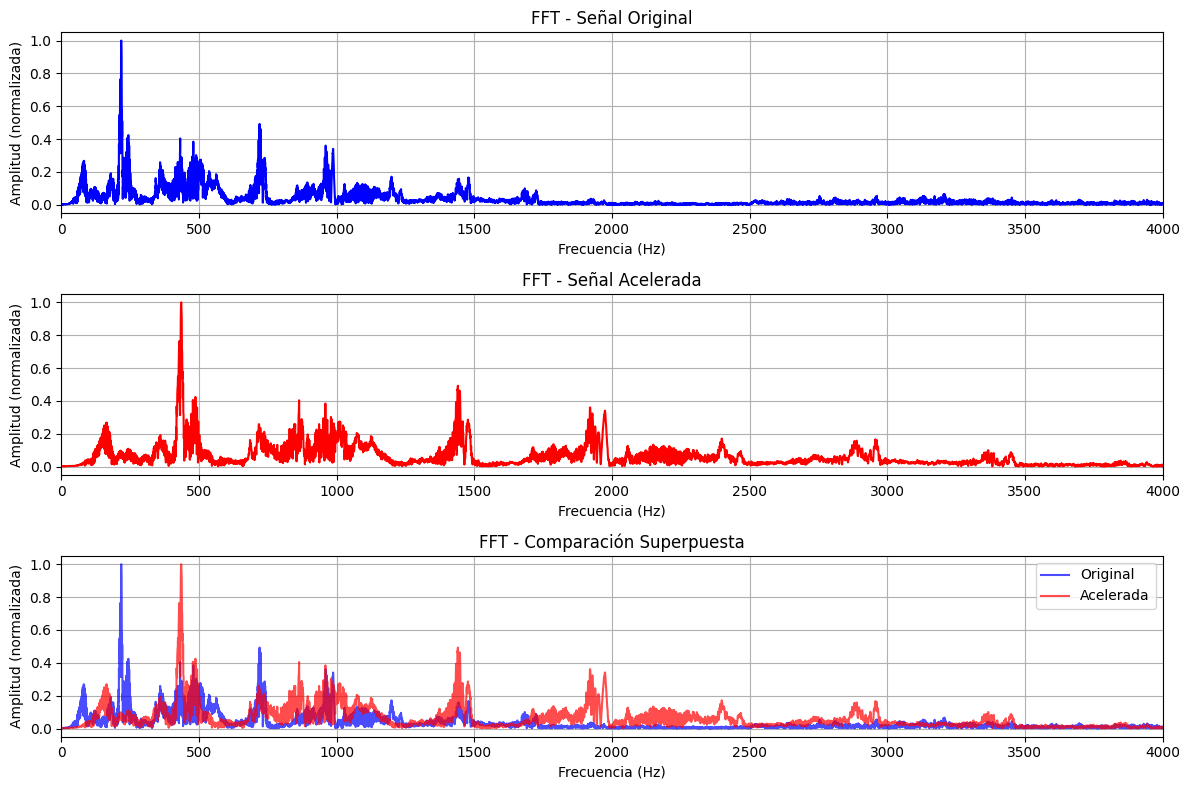

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

x_orig, fs_orig = sf.read('lentoo.wav')
x_accel, fs_accel = sf.read('senal_acelerada.wav')

def compute_fft(x, fs):
    N = len(x)
    X = np.fft.fft(x)
    X_mag = np.abs(X)[:N // 2]  # Solo mitad positiva
    freqs = np.fft.fftfreq(N, 1/fs)[:N // 2]
    return freqs, X_mag / np.max(X_mag)  # normalizar

freqs_orig, fft_orig = compute_fft(x_orig, fs_orig)
freqs_accel, fft_accel = compute_fft(x_accel, fs_accel)


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(freqs_orig, fft_orig, color='blue')
plt.title('FFT - Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(freqs_accel, fft_accel, color='red')
plt.title('FFT - Señal Acelerada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freqs_orig, fft_orig, label='Original', color='blue', alpha=0.7)
plt.plot(freqs_accel, fft_accel, label='Acelerada', color='red', alpha=0.7)
plt.title('FFT - Comparación Superpuesta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

-----------------

PUNTO 9

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import firwin, lfilter

x, fs = sf.read('rapidoo.wav')

#------Parámetros de interpolación----------
L = 2                   # Factor de expansión
cutoff = fs / 2         # Frecuencia de corte (Nyquist)
#-------------------------------------------

# -----Insertar ceros (upsampling) --------
x_upsampled = np.zeros(len(x) * L)
x_upsampled[::L] = x        # Mantener muestras originales en posiciones pares

#-------Filtro interpolador (suavizado de ceros)------
numtaps = 101
taps = firwin(numtaps, cutoff, window='hamming', fs=fs * L)
x_interpolated = lfilter(taps, 1.0, x_upsampled)

# ------Compensar delay y recortar para longitud exacta-------
delay = (numtaps - 1) // 2
x_interpolated = x_interpolated[delay:]
x_interpolated = x_interpolated[:len(x)*L]  # Aseguramos longitud exacta

sf.write('senal_expandida.wav', x_interpolated, fs)

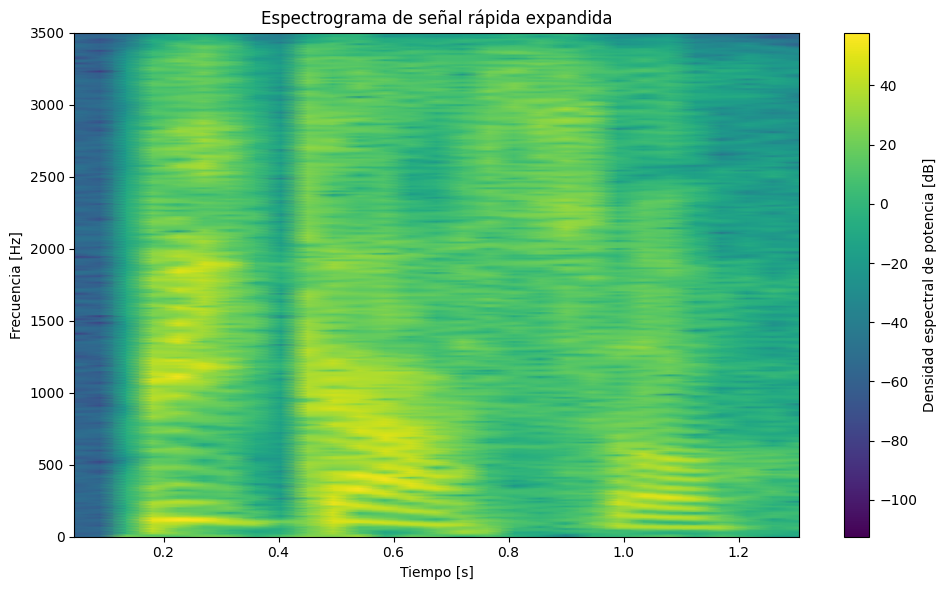

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

fs, señal = wavfile.read('senal_expandida.wav')

ventana = 0.09  
N = int(fs * ventana)
frecuencia_solape = N // 2

f, t, Sxx = spectrogram(señal, fs, window='hann', nperseg=N, noverlap=frecuencia_solape)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-12), shading='gouraud')
plt.title('Espectrograma de señal rápida expandida')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Densidad espectral de potencia [dB]')
plt.ylim([0, 3500])
plt.tight_layout()
plt.show()

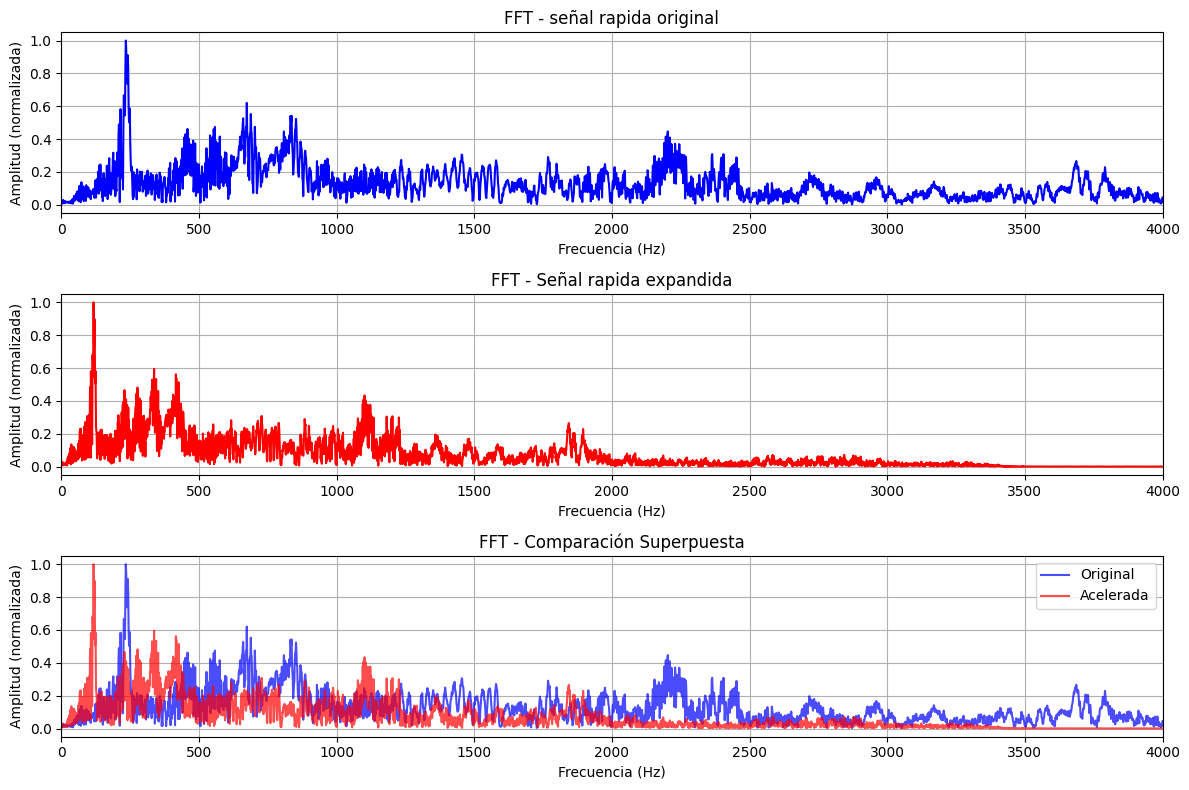

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

x_orig, fs_orig = sf.read('rapidoo.wav')
x_accel, fs_accel = sf.read('senal_expandida.wav')

def compute_fft(x, fs):
    N = len(x)
    X = np.fft.fft(x)
    X_mag = np.abs(X)[:N // 2]  # Solo mitad positiva
    freqs = np.fft.fftfreq(N, 1/fs)[:N // 2]
    return freqs, X_mag / np.max(X_mag)  # normalizar

freqs_orig, fft_orig = compute_fft(x_orig, fs_orig)
freqs_accel, fft_accel = compute_fft(x_accel, fs_accel)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(freqs_orig, fft_orig, color='blue')
plt.title('FFT - señal rapida original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(freqs_accel, fft_accel, color='red')
plt.title('FFT - Señal rapida expandida')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freqs_orig, fft_orig, label='Original', color='blue', alpha=0.7)
plt.plot(freqs_accel, fft_accel, label='Acelerada', color='red', alpha=0.7)
plt.title('FFT - Comparación Superpuesta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

--------------------------------------------------------------------

PUNTO 10

In [17]:
import numpy as np
import soundfile as sf
import scipy.signal as signal

def fir_downsample(x, M=2, num_taps=101):
    """
    Filtra con FIR paso-bajo y luego decima M veces para acelerar la señal.
    """
    # 1) Diseño del filtro paso-bajo (cutoff = fs/(2*M), normalizado a π)
    cutoff = 1.0 / M
    h = signal.firwin(num_taps, cutoff, window='hamming')

    # 2) Filtrado antialiasing
    x_filt = signal.lfilter(h, 1.0, x)

    # 3) Compensar el retardo introducido por el filtro FIR
    delay = (num_taps - 1) // 2
    x_filt = x_filt[delay:]

    # 4) Decimación: se toma una muestra cada M
    y = x_filt[::M]
    return y


def estimate_f0_frames(x, sr,
                       frame_length=1024,
                       hop_length=256,
                       fmin=50, fmax=500,
                       energy_thresh=0.01):
 
    n_frames = 1 + (len(x) - frame_length) // hop_length    # Número total de tramas

    f0 = np.full(n_frames, np.nan)                          # Inicializar el vector de f0 con NaNs

    for i in range(n_frames):
        start = i * hop_length
        frame = x[start:start + frame_length]

        # Descartar tramas de baja energía (probablemente no sonoras)
        if np.mean(frame**2) < energy_thresh:
            continue

        # Aplicar ventana de Hamming y centrar
        frame = frame * np.hamming(len(frame))
        frame = frame - np.mean(frame)

        # Calcular autocorrelación (simétrica)
        corr = np.correlate(frame, frame, mode='full')
        corr = corr[len(corr)//2:]

        # Definir lags mínimos y máximos para la búsqueda
        min_lag = int(sr / fmax)
        max_lag = int(sr / fmin)

        # Verificar límites
        if max_lag >= len(corr):
            continue

        # Buscar pico máximo en el rango válido
        peak = np.argmax(corr[min_lag:max_lag]) + min_lag

        # Validar si es suficientemente alto respecto al valor en cero lag
        if corr[peak] > 0.3 * corr[0]:
            f0[i] = sr / peak               # Estimar f0 como inverso del lag del pico
    return f0


def psola_time_stretch(x, sr, f0, hop_length, stretch_factor):

    # Crear máscara de tramas sonoras (aquellas con f0 válido)
    voiced = ~np.isnan(f0)
    frames = np.where(voiced)[0]

    # Periodos originales en muestras
    periods = sr / f0[voiced]               # Calcular los períodos T0 en muestras
    T0s = np.round(periods).astype(int)

    # 1) Detectar picos de excitación (centros de periodo) en la señal original
    peaks = []
    for frame_idx, P in zip(frames, T0s):
        center = int(frame_idx * hop_length)
        left, right = max(0, center - P), min(len(x), center + P)
        seg = x[left:right]
        if seg.size == 0:
            continue
        local = np.argmax(np.abs(seg))
        peaks.append(left + local)
    peaks = np.array(peaks)
    if len(peaks) < 2:
        return x

    # 2) Construir las nuevas marcas escalando sólo las posiciones, NO los tamaños
    new_peaks = np.round(peaks * stretch_factor).astype(int)

    # 3) Preparar la ventana y el buffer de salida
    maxP = int(np.max(T0s))
    out_len = int(new_peaks[-1] + maxP + 1)
    y = np.zeros(out_len, dtype=float)
    win = np.hanning(2 * maxP)

    # 4) Overlap‑add: usamos P = T0s (tamaño original), no new_T0s
    for orig_peak, syn_peak, P in zip(peaks, new_peaks, T0s):
        o_s, o_e = orig_peak - P, orig_peak + P
        if o_s < 0:   o_s = 0
        if o_e > len(x): o_e = len(x)
        seg = x[o_s:o_e]

        # Ventana correspondiente al segmento
        w = win[maxP - (orig_peak - o_s) : maxP + (o_e - orig_peak)]
        seg = seg * w[:seg.size]

        # Ubicación en la señal de salida
        y_s = syn_peak - P
        y_e = y_s + seg.size

        # Verificar límites de la salida
        if y_s < 0:
            seg = seg[-y_s:]
            y_s = 0
            y_e = seg.size
        if y_e > len(y):
            seg = seg[:len(y) - y_s]
            y_e = len(y)

        # Sumar ventana alineada en la salida
        y[y_s:y_e] += seg

    # 5) Ajuste final (recorte y escalado)
    expected_len = int(len(x) * stretch_factor)
    y = y[:expected_len]                        # Recorte a la longitud esperada
    max_y = np.max(np.abs(y))
    if max_y > 0:
        y *= np.max(np.abs(x)) / (max_y + 1e-9) # Normalizar amplitud

    return y.astype(x.dtype)


if __name__ == '__main__':
    x, sr = sf.read('lentoo.wav')

    x = x.astype(float)             # Asegurar tipo float para procesamiento

    hop = 256                       # Desplazamiento entre tramas
    f0 = estimate_f0_frames(x, sr, frame_length=1024, hop_length=hop)
    f0[np.isnan(f0)] = np.nanmedian(f0)# Rellenar los NaNs con la mediana de f0

    stretch = 0.5                       # Factor de aceleracion
    y_psola_fast = psola_time_stretch(x, sr, f0, hop_length=hop, stretch_factor=stretch)
    sf.write('picasso_rapida_psola.wav', y_psola_fast, sr)

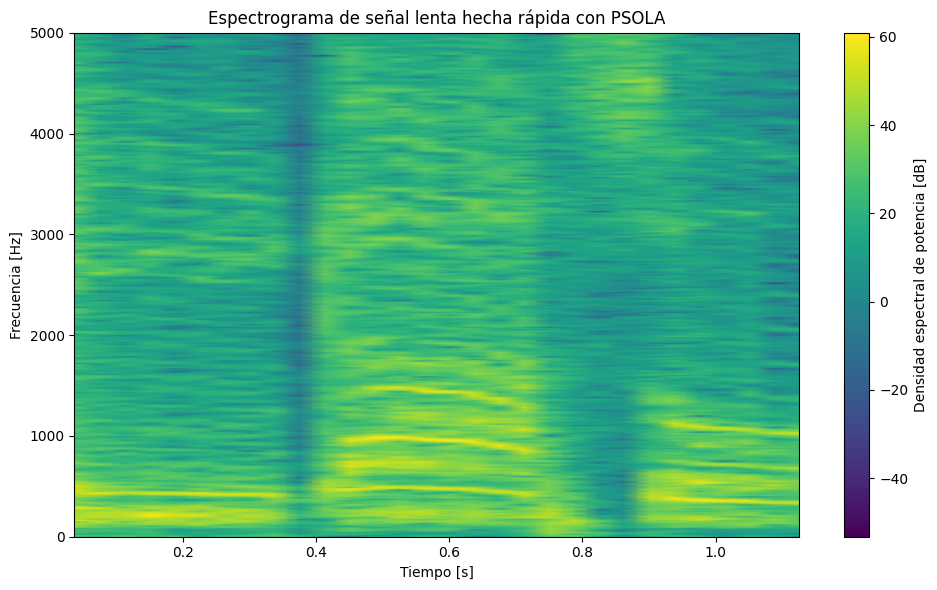

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

fs, señal = wavfile.read('picasso_rapida_psola.wav')

ventana = 0.075  
N = int(fs * ventana)
frecuencia_solape = N // 2

f, t, Sxx = spectrogram(señal, fs, window='hann', nperseg=N, noverlap=frecuencia_solape)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-12), shading='gouraud')
plt.title('Espectrograma de señal lenta hecha rápida con PSOLA')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Densidad espectral de potencia [dB]')
plt.ylim([0, 5000])
plt.tight_layout()
plt.show()

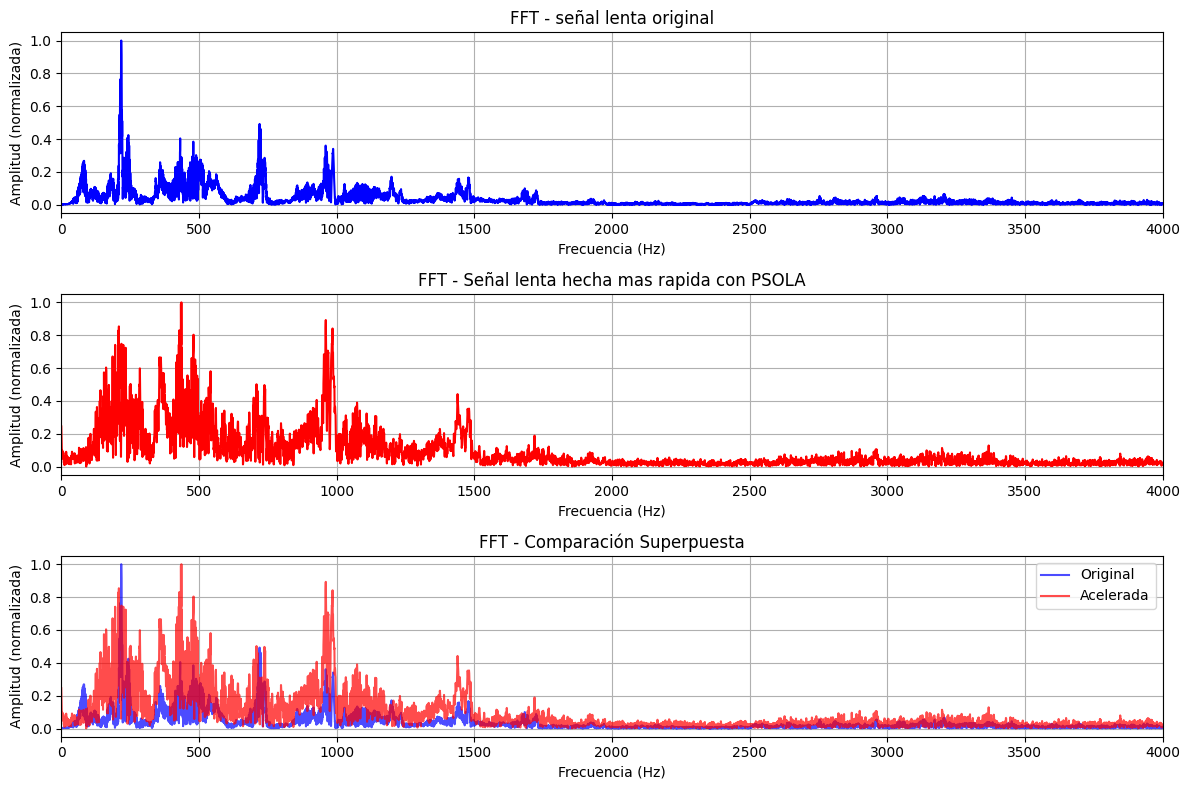

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

x_orig, fs_orig = sf.read('lentoo.wav')
x_accel, fs_accel = sf.read('picasso_rapida_psola.wav')

def compute_fft(x, fs):
    N = len(x)
    X = np.fft.fft(x)
    X_mag = np.abs(X)[:N // 2]  # Solo mitad positiva
    freqs = np.fft.fftfreq(N, 1/fs)[:N // 2]
    return freqs, X_mag / np.max(X_mag)  # normalizar

freqs_orig, fft_orig = compute_fft(x_orig, fs_orig)
freqs_accel, fft_accel = compute_fft(x_accel, fs_accel)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(freqs_orig, fft_orig, color='blue')
plt.title('FFT - señal lenta original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(freqs_accel, fft_accel, color='red')
plt.title('FFT - Señal lenta hecha mas rapida con PSOLA')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freqs_orig, fft_orig, label='Original', color='blue', alpha=0.7)
plt.plot(freqs_accel, fft_accel, label='Acelerada', color='red', alpha=0.7)
plt.title('FFT - Comparación Superpuesta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

---------------------------

PUNTO 11

In [22]:
import numpy as np
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

# ——— FUNCIÓN FIRWIN + FILTRADO (Inserción de ceros) ———

# Esta función ralentiza la señal sin cambiar el pitch usando inserción de ceros
# y filtrado paso-bajo para eliminar aliasing.

def zero_insertion_slowdown(x, L=2, num_taps=101):
    x_up = np.zeros(int(len(x) * L), dtype=float)             # Crear señal ampliada con ceros intercalados
    x_up[::int(L)] = x

    # Diseño de filtro FIR paso-bajo con frecuencia de corte 1/L
    cutoff = 1.0 / L
    h = signal.firwin(num_taps, cutoff, window='hamming')

    # Filtrado para suavizar la interpolación y evitar aliasing
    y = signal.lfilter(h, 1.0, x_up)
    return y

# ——— ESTIMACIÓN DE f0 POR TRAMAS ———

# Calcula el pitch (f0) por autocorrelación en cada trama y genera
# una máscara voiced/unvoiced que marca muestras con señal vocal.

def estimate_f0_frames(x, sr, frame_length=1024, hop_length=256,
                       fmin=50, fmax=500, energy_thresh=0.01):
    n_frames = 1 + (len(x) - frame_length) // hop_length          # Número de tramas a procesar

    # Inicializar array de f0 y máscara de voz
    f0 = np.full(n_frames, np.nan)
    voiced_frame = np.zeros(n_frames, dtype=bool)

    # Recorremos cada trama
    for i in range(n_frames):
        start = i * hop_length
        frame = x[start:start + frame_length]
        if np.mean(frame**2) < energy_thresh:
            continue

        # Aplicar ventana y centrar en cero
        windowed = frame * np.hamming(len(frame))
        windowed -= np.mean(windowed)

        # Autocorrelación de la trama
        corr = np.correlate(windowed, windowed, mode='full')
        corr = corr[len(corr)//2:]

        # Calcular rangos de lags para búsqueda de pico
        min_lag = int(sr / fmax)
        max_lag = int(sr / fmin)
        if max_lag >= len(corr):
            continue

        # Encontrar pico de autocorrelación correspondiente a f0
        peak = np.argmax(corr[min_lag:max_lag]) + min_lag
        if corr[peak] > 0.3 * corr[0]:
            f0[i] = sr / peak
            voiced_frame[i] = True

    # Convertir máscara de tramas a máscara de muestras        
    mask = np.repeat(voiced_frame, hop_length)
    # Asegurar longitud igual a la señal de entrada
    if len(mask) < len(x):
        mask = np.concatenate((mask, np.zeros(len(x) - len(mask), dtype=bool)))
    return f0, mask[:len(x)]

# ——— PSOLA TIME-STRETCH MEZCLA VOICED+UNVOICED ———

# Realiza PSOLA en regiones voiced y zero_insertion en unvoiced,
# mezclando ambas señales para obtener un slowdown de calidad.

def psola_time_stretch(x, sr, f0, voiced_mask, hop_length,
                       stretch_factor, lowpass_cutoff=None,
                       lp_taps=201):

    frames = np.where(~np.isnan(f0))[0]                     # Extraer índices de tramas voiced
    if len(frames) == 0:
        # Si no hay tramas voiced, aplicamos método simple
        return zero_insertion_slowdown(x, L=stretch_factor, num_taps=lp_taps)

    # Calcular períodos de pitch en muestras
    periods = sr / f0[frames]
    T0s = np.round(periods).astype(int)

    # Detectar picos de excitación en cada trama voiced
    peaks = []
    for frame_idx, P in zip(frames, T0s):
        c = int(frame_idx * hop_length)
        seg = x[max(0, c-P):c+P]
        if seg.size < 3:
            continue
        local = np.argmax(np.abs(seg))
        peaks.append(c - P + local)
    if not peaks:
        return zero_insertion_slowdown(x, L=stretch_factor, num_taps=lp_taps)

    peaks = np.array(peaks)
    new_peaks = np.round(peaks * stretch_factor).astype(int)            # Escalar posiciones de picos según stretch_factor
    out_len = int(len(x) * stretch_factor)                              # Longitud de salida aproximada

    y_voiced = np.zeros(out_len)                                        # Buffers para señal voiced y pesos de ventana
    W = np.zeros(out_len)


    # Overlap-Add de segmentos voiced
    for orig, target, P in zip(peaks, new_peaks, T0s):
        o_s = max(0, orig - P)
        o_e = min(len(x), orig + P)
        seg = x[o_s:o_e]
        if seg.size == 0:
            continue
        win = np.hanning(2 * P)
        w0 = P - (orig - o_s)
        w = win[w0:w0 + seg.size]
        if w.size != seg.size:
            continue
        seg_w = seg * w

        y_s = int(target - P)
        y_e = y_s + seg_w.size
        # Descartar si completamente fuera del buffer
        if y_e <= 0 or y_s >= out_len:
            continue
        # Recortar índices al rango válido
        start_idx = max(0, -y_s)
        end_idx = seg_w.size - max(0, y_e - out_len)
        y_s = max(0, y_s)
        y_e = min(out_len, y_e)
        seg_trim = seg_w[start_idx:end_idx]
        w_trim = w[start_idx:end_idx]
        if seg_trim.size == 0:
            continue

        # Acumular señal y pesos    
        y_voiced[y_s:y_e] += seg_trim
        W[y_s:y_e] += w_trim

    maskW = W > 1e-6
    y_voiced[maskW] /= W[maskW]             # Normalizar por sumatorio de ventanas

    # Filtrado paso-bajo para suavizar
    if lowpass_cutoff:
        nyq = sr / 2
        cutoff = lowpass_cutoff / nyq
        taps = signal.firwin(lp_taps, cutoff)
        y_voiced = signal.lfilter(taps, 1.0, y_voiced)

    # ——— Zona unvoiced: cero inserción + FIR
    x_unv = x.copy()
    if voiced_mask.shape[0] < len(x):
        voiced_mask = np.concatenate((voiced_mask, np.zeros(len(x) - voiced_mask.shape[0], dtype=bool)))

    y_unv = zero_insertion_slowdown(x_unv * (~voiced_mask),
                                     L=stretch_factor, num_taps=lp_taps)
    y_unv = y_unv[:out_len]

    # Crear máscara upsampled a out_len
    mask_up = np.repeat(voiced_mask, int(stretch_factor))
    if mask_up.shape[0] < out_len:
        mask_up = np.concatenate((mask_up, np.zeros(out_len - mask_up.shape[0], dtype=bool)))
    mask_up = mask_up[:out_len]

    y = np.where(mask_up, y_voiced, y_unv)

    # Normalización RMS final para nivel adecuado
    rms_x = np.sqrt(np.mean(x**2))
    rms_y = np.sqrt(np.mean(y**2)) + 1e-12
    y *= rms_x / rms_y
    return y

# ——— EJEMPLO ———
if __name__ == '__main__':
    x, sr = sf.read('rapidoo.wav')

    f0, mask = estimate_f0_frames(x, sr, hop_length=256)        # Estimar f0 y máscara voiced/unvoiced
    y = psola_time_stretch(x, sr, f0, mask, hop_length=256,
                           stretch_factor=2.0,
                           lowpass_cutoff=3500,
                           lp_taps=301)
    sf.write('lentoo_slow_mix.wav', y.astype(x.dtype), sr)


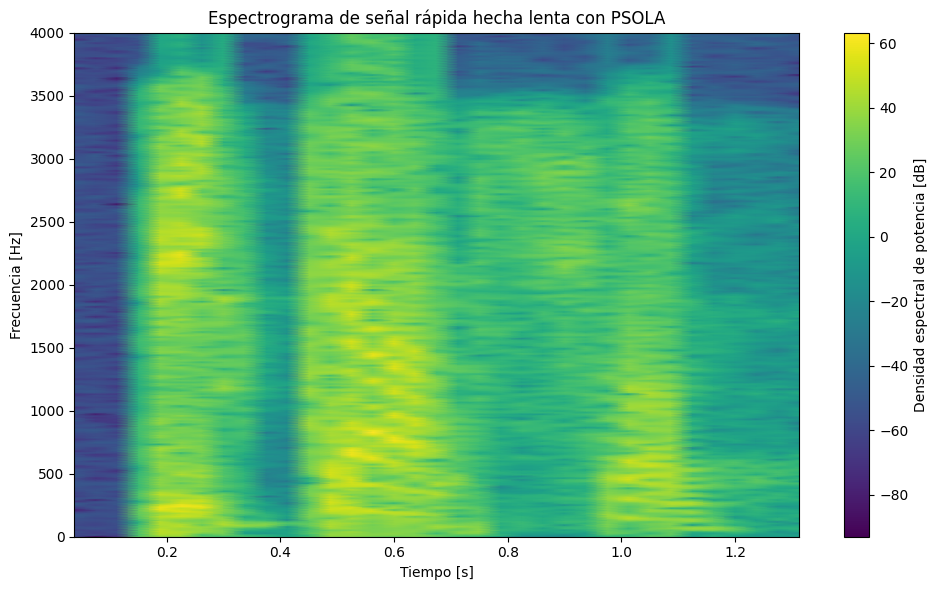

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

fs, señal = wavfile.read('lentoo_slow_mix.wav')

ventana = 0.075  
N = int(fs * ventana)
frecuencia_solape = N // 2

f, t, Sxx = spectrogram(señal, fs, window='hann', nperseg=N, noverlap=frecuencia_solape)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-12), shading='gouraud')
plt.title('Espectrograma de señal rápida hecha lenta con PSOLA')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.colorbar(label='Densidad espectral de potencia [dB]')
plt.ylim([0, 4000])
plt.tight_layout()
plt.show()

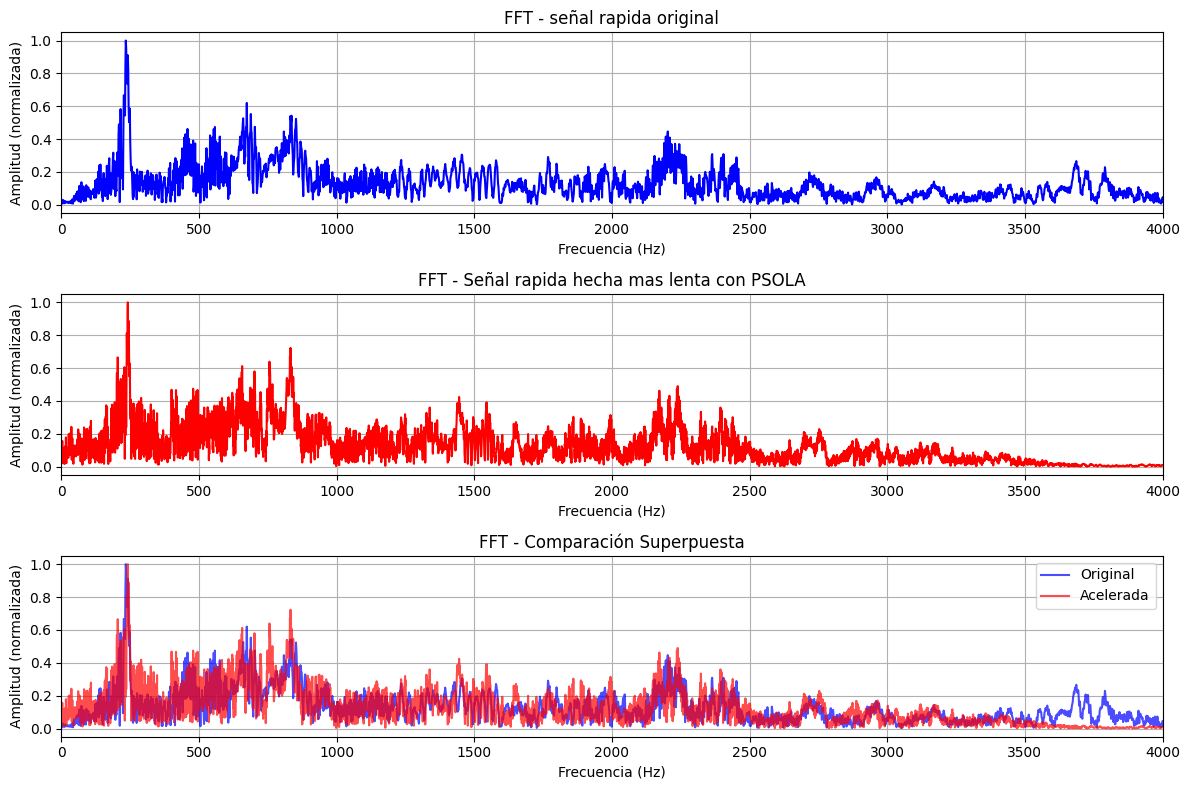

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

x_orig, fs_orig = sf.read('rapidoo.wav')
x_accel, fs_accel = sf.read('lentoo_slow_mix.wav')

def compute_fft(x, fs):
    N = len(x)
    X = np.fft.fft(x)
    X_mag = np.abs(X)[:N // 2]  # Solo mitad positiva
    freqs = np.fft.fftfreq(N, 1/fs)[:N // 2]
    return freqs, X_mag / np.max(X_mag)  # normalizar

freqs_orig, fft_orig = compute_fft(x_orig, fs_orig)
freqs_accel, fft_accel = compute_fft(x_accel, fs_accel)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(freqs_orig, fft_orig, color='blue')
plt.title('FFT - señal rapida original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(freqs_accel, fft_accel, color='red')
plt.title('FFT - Señal rapida hecha mas lenta con PSOLA')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freqs_orig, fft_orig, label='Original', color='blue', alpha=0.7)
plt.plot(freqs_accel, fft_accel, label='Acelerada', color='red', alpha=0.7)
plt.title('FFT - Comparación Superpuesta')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (normalizada)')
plt.xlim([0, 4000])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

------------------